# Imports

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Data Acquisition

In [3]:
df_target = pd.read_csv('/Users/noelkronenberg/Documents/GitHub/hub-visa/00_EDA/lucas_organic_carbon/target/lucas_organic_carbon_target.csv')
df_training = pd.read_csv('/Users/noelkronenberg/Documents/GitHub/hub-visa/00_EDA/lucas_organic_carbon/training_test/lucas_organic_carbon_training_and_test_data.csv')

df_combined = pd.merge(df_training, df_target, left_index=True, right_index=True)

In [4]:
df_combined

,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5,x
0,0.000276,0.000278,0.000280,0.000281,0.000283,0.000284,0.000286,0.000288,0.000289,0.000291,...,-0.000068,-0.000065,-0.000063,-0.000060,-0.000058,-0.000056,-0.000053,-5.061078e-05,-4.816587e-05,very_low
1,0.000351,0.000353,0.000355,0.000357,0.000358,0.000360,0.000362,0.000364,0.000366,0.000368,...,-0.000038,-0.000036,-0.000034,-0.000031,-0.000029,-0.000026,-0.000024,-2.168124e-05,-1.931380e-05,very_low
2,0.000330,0.000331,0.000333,0.000335,0.000337,0.000339,0.000341,0.000343,0.000344,0.000346,...,-0.000084,-0.000081,-0.000079,-0.000076,-0.000074,-0.000072,-0.000069,-6.679452e-05,-6.440287e-05,very_low
3,0.000300,0.000303,0.000305,0.000307,0.000309,0.000312,0.000314,0.000316,0.000318,0.000320,...,-0.000105,-0.000100,-0.000096,-0.000092,-0.000088,-0.000084,-0.000080,-7.568524e-05,-7.155962e-05,moderate
4,0.000388,0.000390,0.000391,0.000393,0.000395,0.000397,0.000399,0.000401,0.000403,0.000405,...,-0.000074,-0.000072,-0.000070,-0.000067,-0.000065,-0.000063,-0.000061,-5.870974e-05,-5.653841e-05,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,0.000457,0.000459,0.000461,0.000463,0.000466,0.000468,0.000470,0.000472,0.000474,0.000476,...,-0.000169,-0.000165,-0.000160,-0.000155,-0.000151,-0.000146,-0.000141,-1.368160e-04,-1.321985e-04,very_low
9891,0.000248,0.000250,0.000253,0.000255,0.000257,0.000259,0.000262,0.000264,0.000266,0.000268,...,-0.000068,-0.000065,-0.000062,-0.000059,-0.000056,-0.000054,-0.000051,-4.790701e-05,-4.510363e-05,very_low
9892,0.000390,0.000393,0.000396,0.000399,0.000402,0.000405,0.000408,0.000411,0.000414,0.000417,...,-0.000173,-0.000169,-0.000165,-0.000161,-0.000157,-0.000153,-0.000149,-1.453230e-04,-1.413482e-04,very_low
9893,0.000334,0.000334,0.000335,0.000336,0.000336,0.000337,0.000338,0.000338,0.000339,0.000340,...,-0.000012,-0.000011,-0.000009,-0.000007,-0.000006,-0.000004,-0.000003,-9.881578e-07,6.056967e-07,very_low


# Modelling

In [28]:
predictors = df_combined.columns[:-1]
target = df_combined.columns[-1]

In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=100, 
    random_state=42
)

In [ ]:
param_grid_elaborate = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
param_grid_simple = {
    'n_estimators': [50],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=rf_classifier, 
    param_grid=param_grid_simple, 
    cv=3, 
    n_jobs=-1, 
    verbose=2
)

In [22]:
grid_search.fit(df_combined[predictors], df_combined[target])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  15.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  15.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  16.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  16.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  16.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  16.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  16.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  17.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  11.7s
[CV] END max_depth=10, 

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [50]},
             verbose=2)

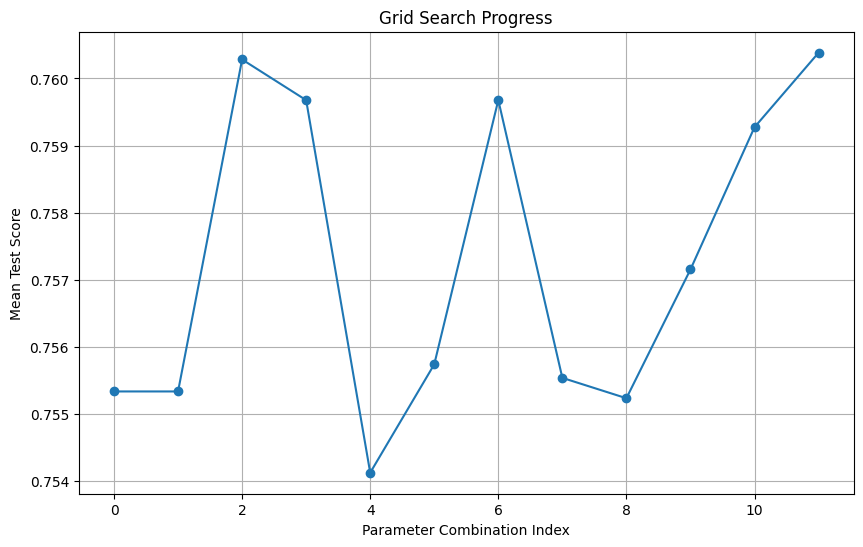

In [26]:
results = pd.DataFrame(grid_search.cv_results_)
mean_test_scores = results['mean_test_score']
params = results['params']

plt.figure(figsize=(10, 6))
plt.plot(mean_test_scores, marker='o')
plt.title('Grid Search Progress')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

In [27]:
best_model = grid_search.best_estimator_

best_model_score = best_model.score(df_combined[predictors], df_combined[target])
cv_scores = cross_val_score(best_model, df_combined[predictors], df_combined[target], cv=5)

print("Best parameters found: ", best_model.get_params())
print("Performance of the best model on the training data:", best_model_score)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Best parameters found:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Performance of the best model on the training data: 0.9886811520970187
Cross-validation scores: [0.75593734 0.77210712 0.76452754 0.75896918 0.75644265]
Mean cross-validation score: 0.7615967660434564
